In [1]:
import pandas as pd
import numpy as np
from sklearnex import patch_sklearn
patch_sklearn()

import sys
import os
import shap

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
# Setting path to load util functions
from pathlib import Path
parent_dir = Path.cwd().parents[1]
sys.path.append(os.path.abspath(parent_dir))

In [3]:
train_df = pd.read_parquet('../../data/final_features_ml/train_all_features_last_month.parquet')
val_df = pd.read_parquet('../../data/final_features_ml/val_all_features_last_month.parquet')
test_df = pd.read_parquet('../../data/final_features_ml/test_all_features_last_month.parquet')

In [4]:
y_train = pd.read_parquet('../../data/3d_array/train_targets.parquet')
y_val = pd.read_parquet('../../data/3d_array/val_targets.parquet')
y_test = pd.read_parquet('../../data/3d_array/test_targets.parquet')

In [5]:
train_df.sort_values(by = ['customer_ID'], inplace=True)
y_train.sort_values(by = ['customer_ID'], inplace=True)
val_df.sort_values(by = ['customer_ID'], inplace=True)
y_val.sort_values(by = ['customer_ID'], inplace=True)
test_df.sort_values(by = ['customer_ID'], inplace=True)
y_test.sort_values(by = ['customer_ID'], inplace=True)

In [6]:
train_df.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
val_df.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [7]:
xgb_params = {'colsample_bylevel': 0.7034102067004069,
 'colsample_bynode': 0.8390472679574996,
 'colsample_bytree': 0.6579388820591151,
 'device': 'cuda',
 'gamma': 0.8748685189195721,
 'learning_rate': 0.03865122131423628,
 'max_depth': 6,
 'min_child_weight': 6.0,
 'n_estimators': 800,
 'random_state': 0,
 'reg_alpha': 0.01227859576937017,
 'reg_lambda': 8.80210770131299,
 'scale_pos_weight': 3.936315894379681,
 'subsample': 0.6258062584859616,
 'tree_method': 'hist'}

In [8]:
from utils.mlflow_ml_model_logger import log_classification_model

In [9]:
from xgboost import XGBClassifier
model = XGBClassifier(**xgb_params)

Starting MLflow Run: XGBoost HP Tuned - Test (0b0292a0ca534336b24a325e035e8af1)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...


c:\Users\vaseekaranv\AppData\Local\anaconda3\envs\nibm_dl\lib\site-packages\xgboost\core.py:158: UserWarning: [20:24:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.9209796
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.9210 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8700
Validation Weighted F1-Score: 0.8585
Validation Macro F1-Score: 0.8033
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.5553
Validation Precision Class 0: 0.8631
Validation Precision Class 1: 0.9066

              precision    recall  f1-score   support

           0     0.8631    0.9800    0.9179    102026
           1     0.9066    0.5553    0.6887     35648

    accuracy                         0.8700    137674
   macro avg     0.8849    0.7676    0.8033    137674
weighted avg     0.8744    0.8700    0.8585    137674

Logged validation metrics (rounded to 4 decimals).
Generating Confusion Matrix plot...
S

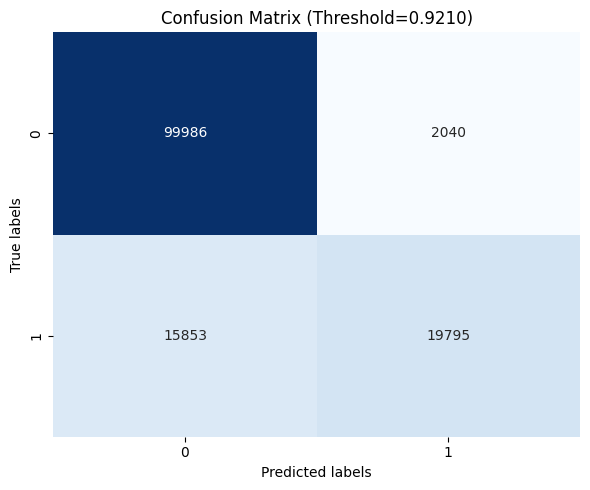

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/20 20:24:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 0b0292a0ca534336b24a325e035e8af1
View the run in the MLflow UI.


In [10]:
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=test_df.drop(columns=['customer_ID']),
        y_val=y_test['target'].values,
        run_name="XGBoost HP Tuned - Test"
    )

In [27]:
explainer = shap.TreeExplainer(model, train_df.drop(columns=['customer_ID']).values, model_output='probability')

In [39]:
shap_values = explainer(val_df.drop(columns=['customer_ID']).head(1))

In [38]:
val_df.drop(columns=['customer_ID']).head(1)

,D_39,B_1,R_1,B_4,B_5,R_2,D_47,B_7,D_51,B_9,...,S_5_Signal distance,B_14_Mean diff,B_11_Mean diff,S_8_Area under the curve,B_11_Area under the curve,S_8_Centroid,B_1_Area under the curve,B_1_Mean diff,S_26_Area under the curve,S_5_Area under the curve
0,0.186344,0.054017,0.009121,0.159391,0.004153,0.002819,0.1961,0.222227,0.005456,0.003317,...,12.000176,0.001929,0.00308,0.006358,0.002409,0.069682,0.003868,0.003871,0.000754,0.000673


In [36]:
model.predict(val_df.drop(columns=['customer_ID']).head(5))

array([1, 0, 0, 0, 0])

In [16]:
val_df.drop(columns=['customer_ID']).iloc[0,:]

D_39                         0.186344
B_1                          0.054017
R_1                          0.009121
B_4                          0.159391
B_5                          0.004153
                               ...   
S_8_Centroid                 0.069682
B_1_Area under the curve     0.003868
B_1_Mean diff                0.003871
S_26_Area under the curve    0.000754
S_5_Area under the curve     0.000673
Name: 0, Length: 425, dtype: float64

In [40]:
shap_values

.values =
array([[ 7.78194715e-04,  3.08992086e-03, -1.49785610e-03,
         1.06838346e-03,  5.94234730e-03, -2.19218236e-03,
         9.32699239e-03,  1.13539482e-02,  3.99815756e-03,
        -1.20970679e-02, -2.71318806e-03,  4.67900716e-04,
        -2.58564761e-03,  2.06324364e-04,  1.74295892e-03,
        -5.77522592e-04,  5.53525027e-04,  2.87406064e-03,
        -7.83714144e-04,  3.61930952e-04,  2.89939934e-04,
        -6.05530565e-04,  1.02956856e-03, -1.15556717e-03,
        -8.76385636e-03, -2.32146641e-03, -6.98443493e-04,
         2.15583911e-03, -4.49815495e-04, -9.83387228e-03,
        -7.95233411e-04,  3.18947434e-03,  1.03414793e-03,
        -2.23530498e-04, -6.07175037e-04,  1.14593491e-03,
         4.42446150e-04, -1.40017773e-04, -1.09652546e-03,
        -8.87226402e-04, -5.77105354e-04, -2.04039039e-03,
        -3.27900289e-03, -1.99433284e-04,  4.70202495e-04,
         3.80297628e-04,  3.15387970e-04, -3.39387101e-04,
         9.40675796e-04, -1.52360395e-04,  5.7

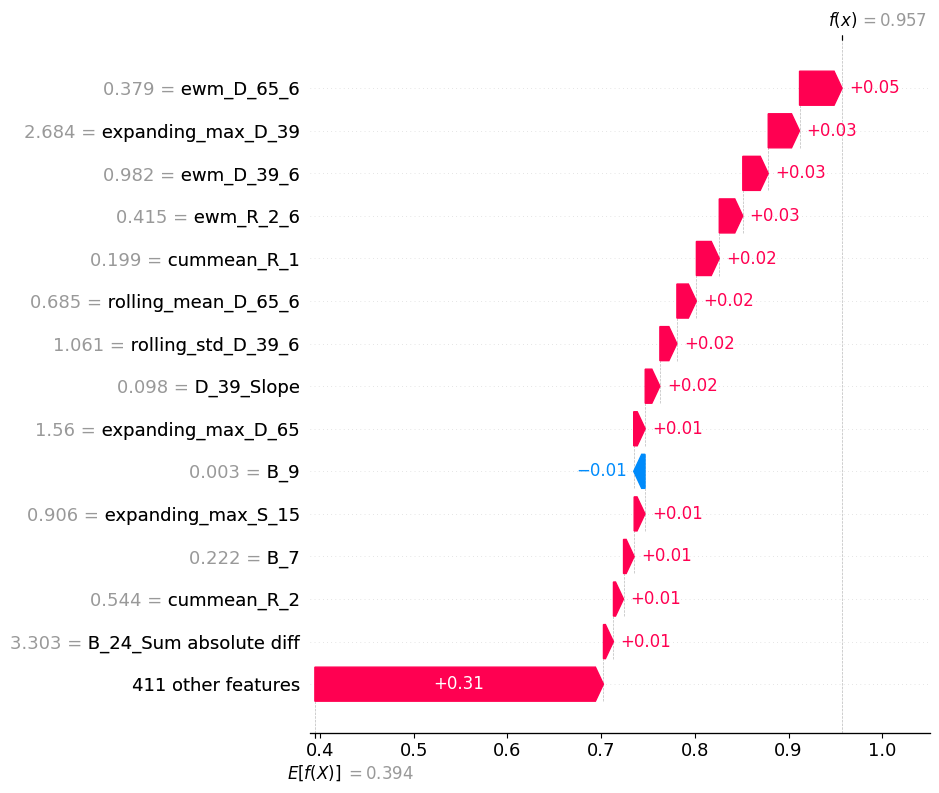

In [41]:
shap.plots.waterfall(shap_values=shap_values[0], max_display=15, show=True)

In [42]:
model.predict_proba(val_df.drop(columns=['customer_ID']).head(1))

array([[0.04281628, 0.9571837 ]], dtype=float32)

In [ ]:
import shap

def get_shap_values(model, input_data, background_data=None, model_output='probability'):
    """
    Generate SHAP values for a given model and input data.

    Parameters:
    - model: Trained model (e.g., XGBoost, LightGBM, etc.)
    - input_data: DataFrame or array-like, the data for which SHAP values are to be computed.
    - background_data: DataFrame or array-like, optional, used for the SHAP explainer background.
                       If None, the input_data will be used as the background.
    - model_output: str, optional, specifies the model output type ('probability' or 'raw').

    Returns:
    - shap_values: SHAP values for the input data.
    """
    # Use the background data if provided, otherwise use the input data
    if background_data is None:
        background_data = input_data

    # Create the SHAP TreeExplainer
    explainer = shap.TreeExplainer(model, background_data, model_output=model_output)

    # Compute SHAP values for the input data
    shap_values = explainer(input_data)

    return shap_values